本书正文的最后一章，我们来看一些真实世界的数据集。对于每个数据集，我们会用之前介绍的方法，从原始数据中提取有意义的内容。展示的方法适用于其它数据集，也包括你的。本章包含了一些各种各样的案例数据集，可以用来练习。

案例数据集可以在Github仓库找到，见第一章。

# 14.1 来自Bitly的USA.gov数据

2011年，URL缩短服务Bitly跟美国政府网站USA.gov合作，提供了一份从生成.gov或.mil短链接的用户那里收集来的匿名数据。在2011年，除实时数据之外，还可以下载文本文件形式的每小时快照。写作此书时（2017年），这项服务已经关闭，但我们保存一份数据用于本书的案例。

以每小时快照为例，文件中各行的格式为JSON（即JavaScript Object Notation，这是一种常用的Web数据格式）。例如，如果我们只读取某个文件中的第一行，那么所看到的结果应该是下面这样：

In [1]:
path = 'datasets/bitly_usagov/example.txt'

In [2]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

Python有内置或第三方模块可以将JSON字符串转换成Python字典对象。这里，我将使用json模块及其loads函数逐行加载已经下载好的数据文件：

In [3]:
import json

In [4]:
path = 'datasets/bitly_usagov/example.txt'

In [5]:
records = [json.loads(line) for line in open(path)]

In [6]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

## 14.1.1 用纯Python代码对时区进行计数

假设我们想要知道该数据集中最常出现的是哪个时区（即tz字段），得到答案的办法有很多。首先，我们用列表推导式取出一组时区：

In [7]:
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

晕！原来并不是所有记录都有时区字段。这个好办，只需在列表推导式末尾加上一个if 'tz'in rec判断即可：

In [8]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [9]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

只看前10个时区，我们发现有些是未知的（即空的）。虽然可以将它们过滤掉，但现在暂时先留着。接下来，为了对时区进行计数，这里介绍两个办法：一个较难（只使用标准Python库），另一个较简单（使用pandas）。计数的办法之一是在遍历时区的过程中将计数值保存在字典中：

In [10]:
def get_counts(sequence):
    counts={}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

如果使用Python标准库的更高级工具，那么你可能会将代码写得更简洁一些：

In [11]:
from collections import defaultdict

In [12]:
def get_counts2(sequence):
    counts = defaultdict(int)
    for x in sequence:
        counts[x] += 1
    return counts

我将逻辑写到函数中是为了获得更高的复用性。要用它对时区进行处理，只需将time_zones传入即可：

In [13]:
counts = get_counts(time_zones)

In [14]:
counts['America/New_York']

1251

In [15]:
len(time_zones)

3440

如果想要得到前10位的时区及其计数值，我们需要用到一些有关字典的处理技巧：

In [16]:
def top_counts(count_dict,n=10):
    value_key_pairs = [(count,tz) for tz,count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

然后有：

In [17]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

如果你搜索Python的标准库，你能找到collections.Counter类，它可以使这项工作更简单：

In [18]:
from collections import Counter

In [19]:
counts = Counter(time_zones)

In [20]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

## 14.1.2 用pandas对时区进行计数

从原始记录的集合创建DateFrame，与将记录列表传递到pandas.DataFrame一样简单：

In [21]:
import pandas as pd

In [22]:
frame = pd.DataFrame(records)

In [23]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [24]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

这里frame的输出形式是摘要视图（summary view），主要用于较大的DataFrame对象。我们然后可以对Series使用value_counts方法：

In [25]:
tz_counts = frame['tz'].value_counts()

In [26]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

我们可以用matplotlib可视化这个数据。为此，我们先给记录中未知或缺失的时区填上一个替代值。fillna函数可以替换缺失值（NA），而未知值（空字符串）则可以通过布尔型数组索引加以替换

In [27]:
clean_tz = frame['tz'].fillna('Missing')

In [28]:
clean_tz[clean_tz == ''] = 'Unknown'

In [29]:
tz_counts = clean_tz.value_counts()

In [30]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

此时，我们可以用seaborn包创建水平柱状图（结果见图14-1）：

In [31]:
import seaborn as sns

In [32]:
subset = tz_counts[:10]

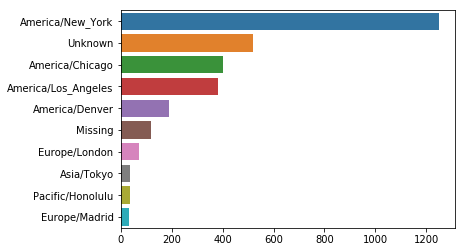

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.barplot(y=subset.index,x=subset.values)
plt.show()

a字段含有执行URL短缩操作的浏览器、设备、应用程序的相关信息：

In [48]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [49]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [50]:
frame['a'][51][:50]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

将这些"agent"字符串中的所有信息都解析出来是一件挺郁闷的工作。一种策略是将这种字符串的第一节（与浏览器大致对应）分离出来并得到另外一份用户行为摘要：

In [51]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])

In [52]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [53]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

现在，假设你想按Windows和非Windows用户对时区统计信息进行分解。为了简单起见，我们假定只要agent字符串中含有"Windows"就认为该用户为Windows用户。由于有的agent缺失，所以首先将它们从数据中移除：

In [54]:
cframe = frame[frame.a.notnull()]

然后计算出各行是否含有Windows的值：

In [55]:
import numpy as np
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),
                       'Windows','Not Windows')

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [56]:
cframe['os'][:5]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

接下来就可以根据时区和新得到的操作系统列表对数据进行分组了：

In [57]:
by_tz_os = cframe.groupby(['tz','os'])

分组计数，类似于value_counts函数，可以用size来计算。并利用unstack对计数结果进行重塑：

In [58]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [59]:
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


最后，我们来选取最常出现的时区。为了达到这个目的，我根据agg_counts中的行数构造了一个间接索引数组：

In [60]:
indexer = agg_counts.sum(1).argsort()

In [61]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

然后我通过take按照这个顺序截取了最后10行最大值：

In [62]:
count_subset = agg_counts.take(indexer[-10:])

In [63]:
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


pandas有一个简便方法nlargest，可以做同样的工作：

In [64]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

然后，如这段代码所示，可以用柱状图表示。我传递一个额外参数到seaborn的barpolt函数，来画一个堆积条形图（见图14-2）：

In [65]:
count_subset = count_subset.stack()

In [66]:
count_subset.name = 'total'

In [67]:
count_subset = count_subset.reset_index()

In [68]:
count_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


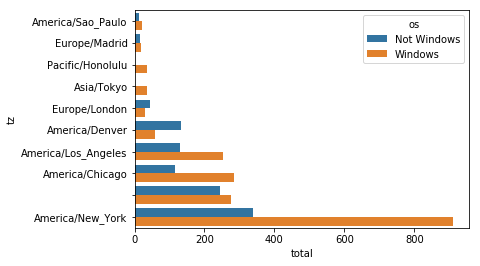

In [69]:
sns.barplot(x='total',y='tz',hue='os',data=count_subset)

这张图不容易看出Windows用户在小分组中的相对比例，因此标准化分组百分比之和为1：

In [73]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

In [74]:
results = count_subset.groupby('tz').apply(norm_total)

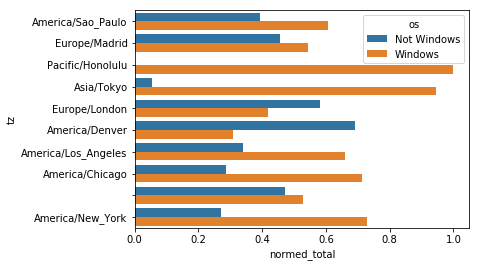

In [75]:
sns.barplot(x='normed_total',y='tz',hue='os',data=results)

我们还可以用groupby的transform方法，更高效的计算标准化的和：

In [76]:
g = count_subset.groupby('tz')

In [77]:
results2 = count_subset.total / g.total.transform('sum')

# 14.2 MovieLens 1M数据集

[GroupLens Research](http://www.grouplens.org/node/73)采集了一组从20世纪90年末到21世纪初由MovieLens用户提供的电影评分数据。这些数据中包括电影评分、电影元数据（风格类型和年代）以及关于用户的人口统计学数据（年龄、邮编、性别和职业等）。基于机器学习算法的推荐系统一般都会对此类数据感兴趣。虽然我不会在本书中详细介绍机器学习技术，但我会告诉你如何对这种数据进行切片切块以满足实际需求。

MovieLens 1M数据集含有来自6000名用户对4000部电影的100万条评分数据。它分为三个表：评分、用户信息和电影信息。将该数据从zip文件中解压出来之后，可以通过pandas.read_table将各个表分别读到一个pandas DataFrame对象中：

In [80]:
import pandas as pd

pd.options.display.max_rows = 10

unames = ['user_id','gender','age','occupation','zip']
users = pd.read_table('datasets/movielens/users.dat',sep='::',
                     header=None,names=unames)

rnames = ['user_id','movie_id','rating','timestamp']
ratings = pd.read_table('datasets/movielens/ratings.dat',sep='::',
                       header=None,names=rnames)

mnames = ['movie_id','title','genres']
movies = pd.read_table('datasets/movielens/movies.dat',sep='::',
                      header=None,names=mnames)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


利用Python的切片语法，通过查看每个DataFrame的前几行即可验证数据加载工作是否一切顺利：

In [82]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [83]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [84]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [85]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


注意，其中的年龄和职业是以编码形式给出的，它们的具体含义请参考该数据集的README文件。分析散布在三个表中的数据可不是一件轻松的事情。假设我们想要根据性别和年龄计算某部电影的平均得分，如果将所有数据都合并到一个表中的话问题就简单多了。我们先用pandas的merge函数将ratings跟users合并到一起，然后再将movies也合并进去。pandas会根据列名的重叠情况推断出哪些列是合并（或连接）键：

In [86]:
data = pd.merge(pd.merge(ratings,users),movies)

In [87]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [88]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

为了按性别计算每部电影的平均得分，我们可以使用pivot_table方法：

In [89]:
mean_ratings = data.pivot_table('rating',index='title',columns='gender',aggfunc='mean')

In [90]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


该操作产生了另一个DataFrame，其内容为电影平均得分，行标为电影名称（索引），列标为性别。现在，我打算过滤掉评分数据不够250条的电影（随便选的一个数字）。为了达到这个目的，我先对title进行分组，然后利用size()得到一个含有各电影分组大小的Series对象：

In [91]:
ratings_by_title = data.groupby('title').size()

In [92]:
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [93]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [94]:
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

标题索引中含有评分数据大于250条的电影名称，然后我们就可以据此从前面的mean_ratings中选取所需的行了：

In [95]:
mean_ratings = mean_ratings.loc[active_titles]

In [96]:
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


为了了解女性观众最喜欢的电影，我们可以对F列降序排列：

In [97]:
top_female_ratings = mean_ratings.sort_values(by='F',ascending=False)

In [98]:
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


## 14.2.1 计算评分分歧

假设我们想要找出男性和女性观众分歧最大的电影。一个办法是给mean_ratings加上一个用于存放平均得分之差的列，并对其进行排序：

In [99]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

按"diff"排序即可得到分歧最大且女性观众更喜欢的电影：

In [100]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [101]:
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


对排序结果反序并取出前10行，得到的则是男性观众更喜欢的电影：

In [102]:
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


如果只是想要找出分歧最大的电影（不考虑性别因素），则可以计算得分数据的方差或标准差：

In [104]:
rating_std_by_title = data.groupby('title')['rating'].std()

In [105]:
rating_std_by_title = rating_std_by_title.loc[active_titles]

In [106]:
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

可能你已经注意到了，电影分类是以竖线（|）分隔的字符串形式给出的。如果想对电影分类进行分析的话，就需要先将其转换成更有用的形式才行。

# 14.3 1880-2010年间全美婴儿姓名

美国社会保障总署（SSA）提供了一份从1880年到现在的婴儿名字频率数据。Hadley Wickham（许多流行R包的作者）经常用这份数据来演示R的数据处理功能。

我们要做一些数据规整才能加载这个数据集，这么做就会产生一个如下的DataFrame，你可以用这个数据集做很多事，例如：

+ 计算指定名字（可以是你自己的，也可以是别人的）的年度比例。  
+ 计算某个名字的相对排名。  
+ 计算各年度最流行的名字，以及增长或减少最快的名字。  
+ 分析名字趋势：元音、辅音、长度、总体多样性、拼写变化、首尾字母等。  
+ 分析外源性趋势：圣经中的名字、名人、人口结构变化等。  

利用前面介绍过的那些工具，这些分析工作都能很轻松地完成，我会讲解其中的一些。

到编写本书时为止，美国社会保障总署将该数据库按年度制成了多个数据文件，其中给出了每个性别/名字组合的出生总数。这些文件的原始档案可以在这里获取：http://www.ssa.gov/oact/babynames/limits.html。

如果你在阅读本书的时候这个页面已经不见了，也可以用搜索引擎找找。

下载"National data"文件names.zip，解压后的目录中含有一组文件（如yob1880.txt）。我用UNIX的head命令查看了其中一个文件的前10行（在Windows上，你可以用more命令，或直接在文本编辑器中打开）：


由于这是一个非常标准的以逗号隔开的格式，所以可以用pandas.read_csv将其加载到DataFrame中：

In [109]:
name1880 = pd.read_csv('datasets/babynames/yob1880.txt',names=['name','sex','births'])

In [110]:
name1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


这些文件中仅含有当年出现超过5次的名字。为了简单起见，我们可以用births列的sex分组小计表示该年度的births总计：

In [111]:
name1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

由于该数据集按年度被分隔成了多个文件，所以第一件事情就是要将所有数据都组装到一个DataFrame里面，并加上一个year字段。使用pandas.concat即可达到这个目的：

In [112]:
years = range(1880,2011)

In [113]:
pieces = []
columns = ['name','sex','births']

for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path,names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
names = pd.concat(pieces,ignore_index=True)

这里需要注意几件事情。第一，concat默认是按行将多个DataFrame组合到一起的；第二，必须指定ignore_index=True，因为我们不希望保留read_csv所返回的原始行号。现在我们得到了一个非常大的DataFrame，它含有全部的名字数据：

In [114]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


有了这些数据之后，我们就可以利用groupby或pivot_table在year和sex级别上对其进行聚合了，如图14-4所示：

In [115]:
total_births = names.pivot_table('births',index='year',columns='sex',aggfunc=sum)

In [116]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


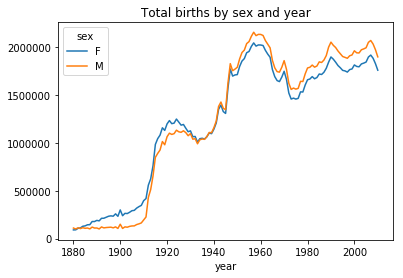

In [117]:
total_births.plot(title='Total births by sex and year')

下面我们来插入一个prop列，用于存放指定名字的婴儿数相对于总出生数的比例。prop值为0.02表示每100名婴儿中有2名取了当前这个名字。因此，我们先按year和sex分组，然后再将新列加到各个分组上：

In [118]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

names = names.groupby(['year','sex']).apply(add_prop)

现在，完整的数据集就有了下面这些列：

In [119]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


在执行这样的分组处理时，一般都应该做一些有效性检查，比如验证所有分组的prop的总和是否为1：

In [120]:
names.groupby(['year','sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

工作完成。为了便于实现更进一步的分析，我需要取出该数据的一个子集：每对sex/year组合的前1000个名字。这又是一个分组操作：

In [121]:
def get_top1000(group):
    return group.sort_values(by='births',ascending=False)[:1000]
grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)
top1000.reset_index(inplace=True,drop=True)

如果你喜欢DIY的话，也可以这样：

In [122]:
pieces = []
for year,group in names.groupby(['year','sex']):
    pieces.append(group.sort_values(by='births',ascending=False)[:1000])
top1000 = pd.concat(pieces,ignore_index=True)

现在的结果数据集就小多了：

In [123]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


接下来的数据分析工作就针对这个top1000数据集了。

## 14.3.1 分析命名趋势

有了完整的数据集和刚才生成的top1000数据集，我们就可以开始分析各种命名趋势了。首先将前1000个名字分为男女两个部分：

In [125]:
boys = top1000[top1000.sex == 'M']

In [126]:
girls = top1000[top1000.sex == 'F']

这是两个简单的时间序列，只需稍作整理即可绘制出相应的图表（比如每年叫做John和Mary的婴儿数）。我们先生成一张按year和name统计的总出生数透视表：

In [127]:
total_births = top1000.pivot_table('births',index='year',
                                  columns='name',aggfunc=sum)

现在，我们用DataFrame的plot方法绘制几个名字的曲线图（见图14-5）：

In [128]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [129]:
subset = total_births[['John','Harry','Mary','Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017039D0F358>,
      dtype=object)

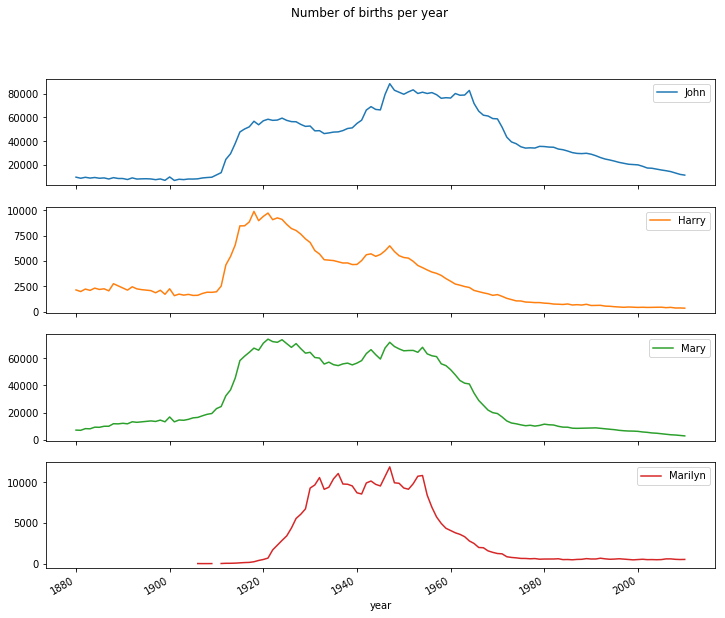

In [130]:
subset.plot(subplots=True,figsize=(12,10),grid=False,
           title="Number of births per year")

从图中可以看出，这几个名字在美国人民的心目中已经风光不再了。但事实并非如此简单，我们在下一节中就能知道是怎么一回事了。

### 14.3.1.1 评估命名多样性的增长

一种解释是父母愿意给小孩起常见的名字越来越少。这个假设可以从数据中得到验证。一个办法是计算最流行的1000个名字所占的比例，我按year和sex进行聚合并绘图（见图14-6）：

In [131]:
table = top1000.pivot_table('prop',index='year',columns='sex',aggfunc=sum)

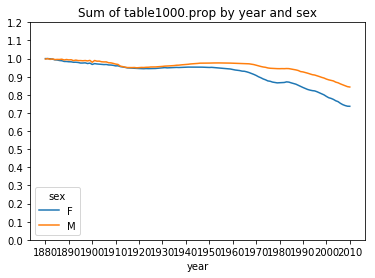

In [133]:
table.plot(title = 'Sum of table1000.prop by year and sex',
          yticks = np.linspace(0,1.2,13),xticks=range(1880,2020,10))

从图中可以看出，名字的多样性确实出现了增长（前1000项的比例降低）。另一个办法是计算占总出生人数前50%的不同名字的数量，这个数字不太好计算。我们只考虑2010年男孩的名字：

In [134]:
df = boys[boys.year == 2010]

In [135]:
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


在对prop降序排列之后，我们想知道前面多少个名字的人数加起来才够50%。虽然编写一个for循环确实也能达到目的，但NumPy有一种更聪明的矢量方式。先计算prop的累计和cumsum，然后再通过searchsorted方法找出0.5应该被插入在哪个位置才能保证不破坏顺序：

In [136]:
prop_cumsum = df.sort_values(by='prop',ascending=False).prop.cumsum()

In [137]:
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

由于数组索引是从0开始的，因此我们要给这个结果加1，即最终结果为117。拿1900年的数据来做个比较，这个数字要小得多：

In [141]:
df = boys[boys.year == 1900]

In [142]:
in1900 = df.sort_values(by='prop',ascending=False).prop.cumsum()

In [143]:
in1900.values.searchsorted(0.5) + 1

25

现在就可以对所有year/sex组合执行这个计算了。按这两个字段进行groupby处理，然后用一个函数计算各分组的这个值：

In [144]:
def get_quantile_count(group,q=0.5):
    group = group.sort_values(by='prop',ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

现在，diversity这个DataFrame拥有两个时间序列（每个性别各一个，按年度索引）。通过IPython，你可以查看其内容，还可以像之前那样绘制图表（如图14-7所示）：

In [145]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


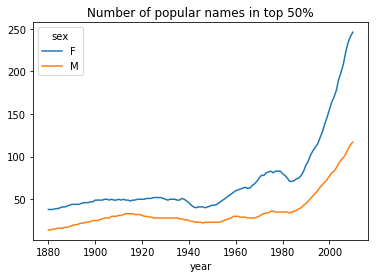

In [146]:
diversity.plot(title='Number of popular names in top 50%')

从图中可以看出，女孩名字的多样性总是比男孩的高，而且还在变得越来越高。读者们可以自己分析一下具体是什么在驱动这个多样性（比如拼写形式的变化）。

### 14.3.1.2 “最后一个字母”的变革

2007年，一名婴儿姓名研究人员Laura Wattenberg在[她自己的网站](http://www.babynamewizard.com)上指出：近百年来，男孩名字在最后一个字母上的分布发生了显著的变化。为了了解具体的情况，我首先将全部出生数据在年度、性别以及末字母上进行了聚合：


In [147]:
get_last_letter = lambda x:x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births',index=last_letters,
                         columns=['sex','year'],aggfunc=sum)

然后，我选出具有一定代表性的三年，并输出前面几行：

In [148]:
subtable = table.reindex(columns=[1910,1960,2010],level='year')

In [149]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

接下来我们需要按总出生数对该表进行规范化处理，以便计算出各性别各末字母占总出生人数的比例：

In [150]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [151]:
letter_prop = subtable / subtable.sum()

In [152]:
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

[26 rows x 6 columns]

有了这个字母比例数据之后，就可以生成一张各年度各性别的条形图了，如图14-8所示：

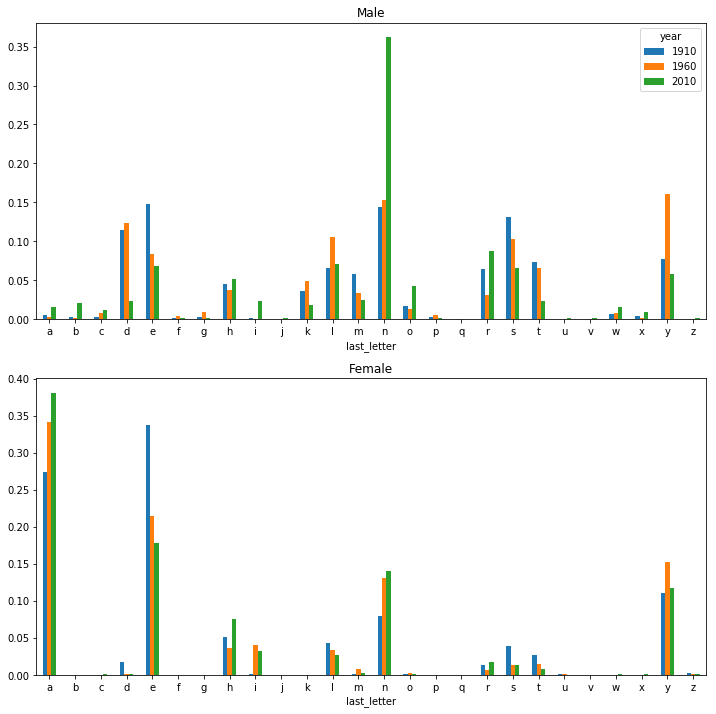

In [158]:
fig,axes = plt.subplots(2,1,figsize=(12,12))
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='Female',legend=False)

可以看出，从20世纪60年代开始，以字母"n"结尾的男孩名字出现了显著的增长。回到之前创建的那个完整表，按年度和性别对其进行规范化处理，并在男孩名字中选取几个字母，最后进行转置以便将各个列做成一个时间序列：

In [160]:
letter_prop = table / table.sum()

In [161]:
dny_ts = letter_prop.loc[['d','n','y'],'M'].T

In [162]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


有了这个时间序列的DataFrame之后，就可以通过其plot方法绘制出一张趋势图了（如图14-9所示）：

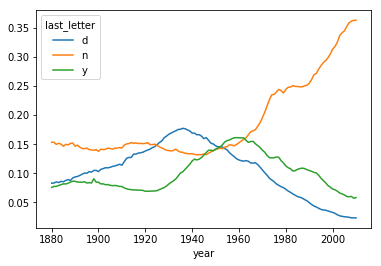

In [163]:
dny_ts.plot()

### 14.3.1.3 变成女孩名字的男孩名字（以及相反的情况）

另一个有趣的趋势是，早年流行于男孩的名字近年来“变性了”，例如Lesley或Leslie。回到top1000数据集，找出其中以"lesl"开头的一组名字：

In [164]:
all_names = pd.Series(top1000.name.unique())

In [165]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]

In [166]:
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

然后利用这个结果过滤其他的名字，并按名字分组计算出生数以查看相对频率：

In [167]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [168]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

接下来，我们按性别和年度进行聚合，并按年度进行规范化处理：

In [169]:
table = filtered.pivot_table('births',index='year',columns='sex',aggfunc='sum')

In [170]:
table = table.div(table.sum(1),axis=0)

In [171]:
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


最后，就可以轻松绘制一张分性别的年度曲线图了（如图2-10所示）：

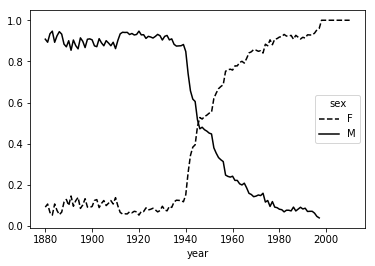

In [172]:
table.plot(style={'M':'k-','F':'k--'})

# 14.4 USDA食品数据库

美国农业部（USDA）制作了一份有关食物营养信息的数据库。Ashley Williams制作了该[数据的JSON版](http://ashleyw.co.uk/project/food-nutrient-database)。 其中的记录如下所示：

```
{
  "id": 21441,
  "description": "KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA CRISPY,
Wing, meat and skin with breading",
  "tags": ["KFC"],
  "manufacturer": "Kentucky Fried Chicken",
"group": "Fast Foods",
  "portions": [
    {
      "amount": 1,
      "unit": "wing, with skin",
      "grams": 68.0
    },

    ...
  ],
  "nutrients": [
    {
      "value": 20.8,
      "units": "g",
      "description": "Protein",
      "group": "Composition"
    },

    ...
  ]
}


```

每种食物都带有若干标识性属性以及两个有关营养成分和分量的列表。这种形式的数据不是很适合分析工作，因此我们需要做一些规整化以使其具有更好用的形式。

从上面列举的那个网址下载并解压数据之后，你可以用任何喜欢的JSON库将其加载到Python中。我用的是Python内置的json模块


In [173]:
import json

In [174]:
db = json.load(open('datasets/usda_food/database.json'))

In [175]:
len(db)

6636

db中的每个条目都是一个含有某种食物全部数据的字典。nutrients字段是一个字典列表，其中的每个字典对应一种营养成分：

In [176]:
db[0].keys()

dict_keys(['id', 'group', 'description', 'portions', 'nutrients', 'tags', 'manufacturer'])

In [177]:
db[0]['nutrients'][0]

{'description': 'Protein',
 'group': 'Composition',
 'units': 'g',
 'value': 25.18}

In [178]:
nutrients = pd.DataFrame(db[0]['nutrients'])

In [179]:
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


在将字典列表转换为DataFrame时，可以只抽取其中的一部分字段。这里，我们将取出食物的名称、分类、编号以及制造商等信息：

In [180]:
info_keys = ['description','group','id','manufacturer']

In [181]:
info = pd.DataFrame(db,columns=info_keys)

In [182]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [183]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
description     6636 non-null object
group           6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


通过value_counts，你可以查看食物类别的分布情况：

In [184]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Name: group, dtype: int64

现在，为了对全部营养数据做一些分析，最简单的办法是将所有食物的营养成分整合到一个大表中。我们分几个步骤来实现该目的。首先，将各食物的营养成分列表转换为一个DataFrame，并添加一个表示编号的列，然后将该DataFrame添加到一个列表中。最后通过concat将这些东西连接起来就可以了：

顺利的话，nutrients的结果是：

In [187]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)
nutrients = pd.concat(nutrients,ignore_index=True)

In [188]:
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
...,...,...,...,...,...
389350,"Vitamin B-12, added",Vitamins,mcg,0.000,43546
389351,Cholesterol,Other,mg,0.000,43546
389352,"Fatty acids, total saturated",Other,g,0.072,43546
389353,"Fatty acids, total monounsaturated",Other,g,0.028,43546


我发现这个DataFrame中无论如何都会有一些重复项，所以直接丢弃就可以了：

In [189]:
nutrients.duplicated().sum()

14179

In [190]:
nutrients = nutrients.drop_duplicates()

由于两个DataFrame对象中都有"group"和"description"，所以为了明确到底谁是谁，我们需要对它们进行重命名：

In [191]:
col_mapping = {'description':'food',
              'group':'fgroup'}

In [192]:
info = info.rename(columns=col_mapping,copy=False)

In [193]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
food            6636 non-null object
fgroup          6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [194]:
col_mapping = {'description':'nutrients',
              'group':'nutgroup'}

In [195]:
nutrients = nutrients.rename(columns=col_mapping,copy=False)

In [196]:
nutrients

,nutrients,nutgroup,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
...,...,...,...,...,...
389350,"Vitamin B-12, added",Vitamins,mcg,0.000,43546
389351,Cholesterol,Other,mg,0.000,43546
389352,"Fatty acids, total saturated",Other,g,0.072,43546
389353,"Fatty acids, total monounsaturated",Other,g,0.028,43546


做完这些，就可以将info跟nutrients合并起来：

In [197]:
ndata = pd.merge(nutrients,info,on='id',how='outer')

In [198]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
nutrients       375176 non-null object
nutgroup        375176 non-null object
units           375176 non-null object
value           375176 non-null float64
id              375176 non-null int64
food            375176 non-null object
fgroup          375176 non-null object
manufacturer    293054 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [199]:
ndata.iloc[30000]

nutrients                                      Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

我们现在可以根据食物分类和营养类型画出一张中位值图（如图14-11所示）：

In [201]:
result = ndata.groupby(['nutrients','fgroup'])['value'].quantile(0.5)

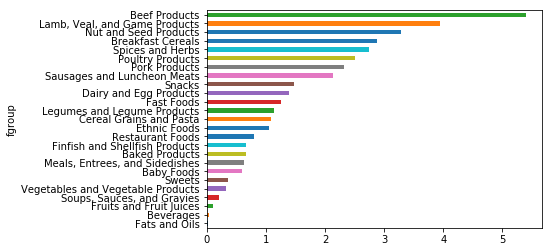

In [203]:
result['Zinc, Zn'].sort_values().plot(kind='barh')

只要稍微动一动脑子，就可以发现各营养成分最为丰富的食物是什么了：

In [206]:
by_nutrient = ndata.groupby(['nutgroup','nutrients'])

get_maximum = lambda x:x.loc[x.value.idxmax()]
get_minumum = lambda x:x.loc[x.value.idxmin()]

max_foods = by_nutrient.apply(get_maximum)[['value','food']]
max_foods.food = max_foods.food.str[:50]

由于得到的DataFrame很大，所以不方便在书里面全部打印出来。这里只给出"Amino Acids"营养分组：

In [207]:
max_foods.loc['Amino Acids']['food']

nutrients
Alanine                          Gelatins, dry powder, unsweetened
Arginine                              Seeds, sesame flour, low-fat
Aspartic acid                                  Soy protein isolate
Cystine               Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                  Soy protein isolate
                                       ...                        
Serine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Threonine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Tryptophan        Sea lion, Steller, meat with fat (Alaska Native)
Tyrosine         Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Valine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Name: food, Length: 19, dtype: object

# 14.5 2012联邦选举委员会数据库

美国联邦选举委员会发布了有关政治竞选赞助方面的数据。其中包括赞助者的姓名、职业、雇主、地址以及出资额等信息。我们对2012年美国总统大选的数据集比较感兴趣（http://www.fec.gov/disclosurep/PDownload.do）。 我在2012年6月下载的数据集是一个150MB的CSV文件（P00000001-ALL.csv），我们先用pandas.read_csv将其加载进来：

In [208]:
fec = pd.read_csv('datasets/fec/P00000001-ALL.csv')

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [209]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


该DataFrame中的记录如下所示：

In [210]:
fec.iloc[123456]

cmte_id             C00431445
cand_id             P80003338
cand_nm         Obama, Barack
contbr_nm         ELLMAN, IRA
contbr_city             TEMPE
                    ...      
receipt_desc              NaN
memo_cd                   NaN
memo_text                 NaN
form_tp                 SA17A
file_num               772372
Name: 123456, Length: 16, dtype: object

你可能已经想出了许多办法从这些竞选赞助数据中抽取有关赞助人和赞助模式的统计信息。我将在接下来的内容中介绍几种不同的分析工作（运用到目前为止已经学到的方法）。

不难看出，该数据中没有党派信息，因此最好把它加进去。通过unique，你可以获取全部的候选人名单：

In [211]:
unique_cands = fec.cand_nm.unique()

In [212]:
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [213]:
unique_cands[2]

'Obama, Barack'

指明党派信息的方法之一是使用字典：

In [214]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

现在，通过这个映射以及Series对象的map方法，你可以根据候选人姓名得到一组党派信息：

In [215]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [216]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [217]:
fec['party'] = fec.cand_nm.map(parties)

In [218]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

这里有两个需要注意的地方。第一，该数据既包括赞助也包括退款（负的出资额）：

In [219]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

为了简化分析过程，我限定该数据集只能有正的出资额：

In [220]:
fec = fec[fec.contb_receipt_amt > 0]

由于Barack Obama和Mitt Romney是最主要的两名候选人，所以我还专门准备了一个子集，只包含针对他们两人的竞选活动的赞助信息：

In [221]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack','Romney, Mitt'])]

# 14.5.1 根据职业和雇主统计赞助信息

基于职业的赞助信息统计是另一种经常被研究的统计任务。例如，律师们更倾向于资助民主党，而企业主则更倾向于资助共和党。你可以不相信我，自己看那些数据就知道了。首先，根据职业计算出资总额，这很简单：

In [222]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

不难看出，许多职业都涉及相同的基本工作类型，或者同一样东西有多种变体。下面的代码片段可以清理一些这样的数据（将一个职业信息映射到另一个）。注意，这里巧妙地利用了dict.get，它允许没有映射关系的职业也能“通过”：

In [223]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}

f = lambda x:occ_mapping.get(x,x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [224]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)


现在，你可以通过pivot_table根据党派和职业对数据进行聚合，然后过滤掉总出资额不足200万美元的数据：

In [225]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                               index='contbr_occupation',
                               columns='party',aggfunc='sum')

In [226]:
over_2mm = by_occupation[by_occupation.sum(1)>2000000]

In [227]:
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
...,...,...
PRESIDENT,1878509.95,4.720924e+06
PROFESSOR,2165071.08,2.967027e+05
REAL ESTATE,528902.09,1.625902e+06


把这些数据做成柱状图看起来会更加清楚（'barh'表示水平柱状图，如图14-12所示）：

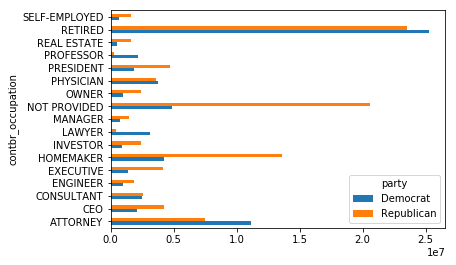

In [228]:
over_2mm.plot(kind='barh')

你可能还想了解一下对Obama和Romney总出资额最高的职业和企业。为此，我们先对候选人进行分组，然后使用本章前面介绍的类似top的方法：

In [229]:
def get_top_amounts(group,key,n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

然后根据职业和雇主进行聚合：

In [230]:
grouped = fec_mrbo.groupby('cand_nm')

In [231]:
grouped.apply(get_top_amounts,'contbr_occupation',n=7)

cand_nm        contbr_occupation    
Obama, Barack  RETIRED                  25305116.38
               ATTORNEY                 11141982.97
               INFORMATION REQUESTED     4866973.96
               HOMEMAKER                 4248875.80
               PHYSICIAN                 3735124.94
                                           ...     
Romney, Mitt   HOMEMAKER                 8147446.22
               ATTORNEY                  5364718.82
               PRESIDENT                 2491244.89
               EXECUTIVE                 2300947.03
               C.E.O.                    1968386.11
Name: contb_receipt_amt, Length: 14, dtype: float64

In [232]:
grouped.apply(get_top_amounts,'contbr_employer',n=10)

cand_nm        contbr_employer      
Obama, Barack  RETIRED                  22694358.85
               SELF-EMPLOYED            17080985.96
               NOT EMPLOYED              8586308.70
               INFORMATION REQUESTED     5053480.37
               HOMEMAKER                 2605408.54
                                           ...     
Romney, Mitt   CREDIT SUISSE              281150.00
               MORGAN STANLEY             267266.00
               GOLDMAN SACH & CO.         238250.00
               BARCLAYS CAPITAL           162750.00
               H.I.G. CAPITAL             139500.00
Name: contb_receipt_amt, Length: 20, dtype: float64

# 14.5.2 对出资额分组

还可以对该数据做另一种非常实用的分析：利用cut函数根据出资额的大小将数据离散化到多个面元中：

In [233]:
bins = np.array([0,1,10,100,1000,10000,100000,1000000,10000000])

In [234]:
labels = pd.cut(fec_mrbo.contb_receipt_amt,bins)

In [235]:
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

现在可以根据候选人姓名以及面元标签对奥巴马和罗姆尼数据进行分组，以得到一个柱状图

In [236]:
grouped =fec_mrbo.groupby(['cand_nm',labels])

In [237]:
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


从这个数据中可以看出，在小额赞助方面，Obama获得的数量比Romney多得多。你还可以对出资额求和并在面元内规格化，以便图形化显示两位候选人各种赞助额度的比例（见图14-13）：

In [238]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)

In [241]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1),axis=0)

In [242]:
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


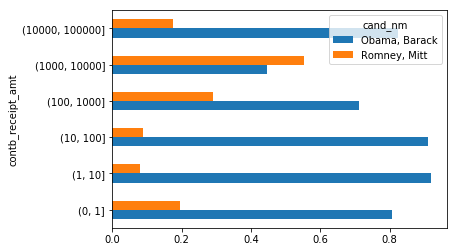

In [243]:
normed_sums[:-2].plot(kind='barh')

我排除了两个最大的面元，因为这些不是由个人捐赠的。

还可以对该分析过程做许多的提炼和改进。比如说，可以根据赞助人的姓名和邮编对数据进行聚合，以便找出哪些人进行了多次小额捐款，哪些人又进行了一次或多次大额捐款。我强烈建议你下载这些数据并自己摸索一下。

# 14.5.3 根据州统计赞助信息

根据候选人和州对数据进行聚合是常规操作：

In [244]:
grouped = fec_mrbo.groupby(['cand_nm','contbr_st'])

In [245]:
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)

In [246]:
totals = totals[totals.sum(1) > 100000]

In [247]:
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


如果对各行除以总赞助额，就会得到各候选人在各州的总赞助额比例：

In [249]:
percent = totals.div(totals.sum(1),axis=0)

In [250]:
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224


# 14.6 总结

我们已经完成了正文的最后一章。附录中有一些额外的内容，可能对你有用。

本书第一版出版已经有5年了，Python已经成为了一个流行的、广泛使用的数据分析语言。你从本书中学到的方法，在相当长的一段时间都是可用的。我希望本书介绍的工具和库对你的工作有用。